In [1]:
import numpy as np

In [10]:
def AND(x1, x2):
#     w1=0.5
#     w2=0.5
    b=-0.6
#     hf=w1*x1+w2*x2+b
    x=np.array([x1,x2])
    w=np.array([0.5,0.5])
    hf=np.sum(w*x)+b    
    if hf<=0:
        return 0
    else :
        return 1

for data in [(0,0),(0,1),(1,0),(1,1)]:
    print(AND(data[0],data[1])) #0 0 0 1
    

0
0
0
1


In [13]:
def NAND(x1, x2):
    b=0.6    
    x=np.array([x1,x2])
    w=np.array([-0.5,-0.5])    
    hf=np.sum(w*x)+b    
    if hf<=0:
        return 0
    else :
        return 1
for data in [(0,0),(0,1),(1,0),(1,1)]:
    print(NAND(data[0],data[1])) #1 1 1 0
    

1
1
1
0


In [15]:
def OR(x1, x2):
    b=-0.1    
    x=np.array([x1,x2])
    w=np.array([0.5,0.5])    
    hf=np.sum(w*x)+b    
    if hf<=0:
        return 0
    else :
        return 1
for data in [(0,0),(0,1),(1,0),(1,1)]:
    print(OR(data[0],data[1])) #1 1 1 0
    

0
1
1
1


In [17]:
#AND, NAND, OR 함수를 적절하게 호출하여
#리턴된 값을 통해 XOR 결과를 출력하는 함수를 구현하시오.
def XOR(x1,x2):
    r1=NAND(x1,x2)
    r2=OR(x1,x2)
    y=AND(r1,r2)
    return y
    
for data in [(0,0),(0,1),(1,0),(1,1)]:
    print(XOR(data[0],data[1])) #0 1 1 0    

0
1
1
0


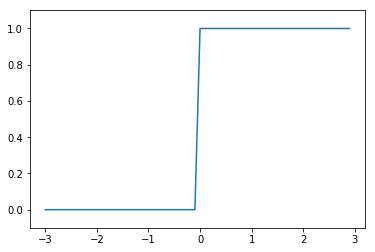

In [22]:
import matplotlib.pyplot as plt
def myStep(x):
    return np.array(x>0, dtype=np.int)
    
x=np.arange(-3, 3, 0.1)
y=myStep(x)
plt.plot(x,y)
plt.ylim(-0.1,1.1)
plt.show()

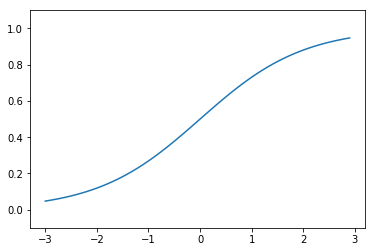

In [23]:
import matplotlib.pyplot as plt
def mySig(x):
    return 1/(1+np.exp(-x))
    
x=np.arange(-3, 3, 0.1)
y=mySig(x)
plt.plot(x,y)
plt.ylim(-0.1,1.1)
plt.show()
"""
선형함수:출력이 입력값의 상수배만큼 변하는 함수
f(x)=ax+b => 1개의 직선
비선형함수:1개의 직선으로는 그릴 수 없는 함수
"""

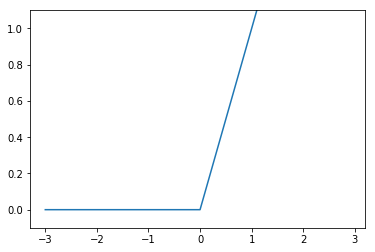

In [25]:
def myRelu(x):
    return np.maximum(0,x)    
x=np.arange(-3, 3, 0.1)
y=myRelu(x)
plt.plot(x,y)
plt.ylim(-0.1,1.1)
plt.show()

In [26]:
#MLP 분류기 기반 타이타닉 데이터 분석

In [196]:
import pandas as pd
import numpy as np
import re
import matplotlib.pyplot as plt
%matplotlib inline

In [197]:
train_df=pd.read_csv("train.csv")
test_df=pd.read_csv("test.csv")

In [198]:
#train_df.head()
full_df=pd.concat([train_df, test_df], ignore_index=True)

In [199]:
train_df.info()
test_df.info()
full_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
PassengerId    891 non-null int64
Survived       891 non-null int64
Pclass         891 non-null int64
Name           891 non-null object
Sex            891 non-null object
Age            714 non-null float64
SibSp          891 non-null int64
Parch          891 non-null int64
Ticket         891 non-null object
Fare           891 non-null float64
Cabin          204 non-null object
Embarked       889 non-null object
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 entries, 0 to 417
Data columns (total 11 columns):
PassengerId    418 non-null int64
Pclass         418 non-null int64
Name           418 non-null object
Sex            418 non-null object
Age            332 non-null float64
SibSp          418 non-null int64
Parch          418 non-null int64
Ticket         418 non-null object
Fare           417 non-null float

In [200]:
train_df=pd.DataFrame()
test_df=pd.DataFrame()

In [201]:
def extract_df():
    tr_df=full_df.loc[full_df['Survived'].notnull()]
    te_df=full_df.loc[full_df['Survived'].isnull()]
    return tr_df, te_df
    
train_df, test_df=extract_df()

In [202]:
title_sr=full_df.Name.str.extract(' ([A-Za-z]+)\.', expand=False)
#expand=True => 데이터프레임(default)
#호칭 추출 : 공백문자+알파벳문자1개이상+점
full_df['Title']=title_sr
pd.crosstab(full_df['Title'], full_df['Sex'])
title_sr.value_counts()

Mr          757
Miss        260
Mrs         197
Master       61
Dr            8
Rev           8
Col           4
Mlle          2
Ms            2
Major         2
Countess      1
Don           1
Sir           1
Mme           1
Dona          1
Capt          1
Lady          1
Jonkheer      1
Name: Name, dtype: int64

In [203]:
#호칭 단순화
title_list=set(title_sr)
map_title_dic={"Mlle":"Miss", "Ms":"Miss", "Mme":"Mrs"}
working_dic={}
for key in ['Lady', 'Countess', 'Capt', 'Col', 'Don', 
            'Major', 'Rev','Sir','Jonkheer','Dona']:
    working_dic[key]="Rare"

In [204]:
map_title_dic.update(working_dic)

In [205]:
map_title_dic #호칭을 매핑하기 위한 규칙 정의 딕셔니리
full_df['Title']=full_df['Title'].replace(map_title_dic)

In [206]:
set(list(full_df['Title']))

{'Dr', 'Master', 'Miss', 'Mr', 'Mrs', 'Rare'}

In [207]:
SubCol1=test_df.PassengerId
full_df.drop(['PassengerId', 'Name', 'Ticket', 'Cabin'], 
             axis=1,inplace=True)

In [208]:
train_df, test_df=extract_df()

In [209]:
train_df
#Pclass별(1,2,3) 생존자(Survived) 평균
train_df[['Pclass','Survived']].groupby(['Pclass'],as_index=False).mean()

,Pclass,Survived
0,1,0.629630
1,2,0.472826
2,3,0.242363


In [210]:
feature_list=list(full_df)
for f in feature_list:
    print(f+" "+ str(len(full_df[f].value_counts())))

Age 98
Embarked 3
Fare 281
Parch 8
Pclass 3
Sex 2
SibSp 7
Survived 2
Title 6


array([[<matplotlib.axes._subplots.AxesSubplot object at 0x000001E62FE4EE88>,
      dtype=object)

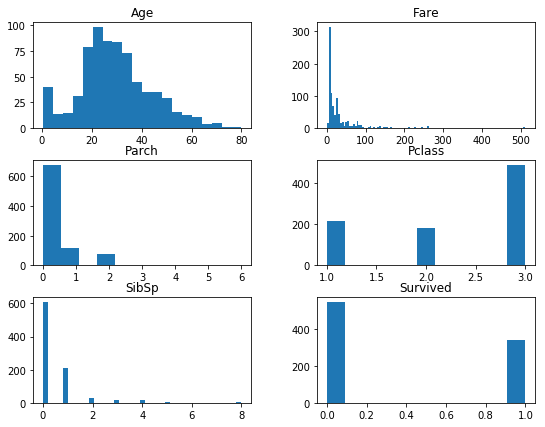

In [211]:
train_df.hist(figsize=(9,7), grid=False, bins="auto")

In [212]:
train_df.isnull().sum()
test_df.isnull().sum()
full_df['Embarked'].value_counts()
full_df['Embarked'].fillna("S", inplace=True)

In [213]:
full_df['Fare'].median()
full_df['Fare'].fillna(test_df['Fare'].median(), 
                       inplace=True)

In [214]:
train_df,test_df=extract_df()

In [215]:
full_df['Sex']=full_df['Sex'].map({'female':0, 'male':1})

In [216]:
def onehot(df, feature_list): #원핫 인코딩
    df=pd.get_dummies(df, columns=feature_list)
    return df

onehot_list=['Title','Pclass','Embarked']
full_df=onehot(full_df, onehot_list)

In [217]:
full_df

,Age,Fare,Parch,Sex,SibSp,Survived,Title_Dr,Title_Master,Title_Miss,Title_Mr,Title_Mrs,Title_Rare,Pclass_1,Pclass_2,Pclass_3,Embarked_C,Embarked_Q,Embarked_S
0,22.0,7.2500,0,1,1,0.0,0,0,0,1,0,0,0,0,1,0,0,1
1,38.0,71.2833,0,0,1,1.0,0,0,0,0,1,0,1,0,0,1,0,0
2,26.0,7.9250,0,0,0,1.0,0,0,1,0,0,0,0,0,1,0,0,1
3,35.0,53.1000,0,0,1,1.0,0,0,0,0,1,0,1,0,0,0,0,1
4,35.0,8.0500,0,1,0,0.0,0,0,0,1,0,0,0,0,1,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1304,NaN,8.0500,0,1,0,NaN,0,0,0,1,0,0,0,0,1,0,0,1
1305,39.0,108.9000,0,0,0,NaN,0,0,0,0,0,1,1,0,0,1,0,0
1306,38.5,7.2500,0,1,0,NaN,0,0,0,1,0,0,0,0,1,0,0,1
1307,NaN,8.0500,0,1,0,NaN,0,0,0,1,0,0,0,0,1,0,0,1


In [218]:
full_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1309 entries, 0 to 1308
Data columns (total 18 columns):
Age             1046 non-null float64
Fare            1309 non-null float64
Parch           1309 non-null int64
Sex             1309 non-null int64
SibSp           1309 non-null int64
Survived        891 non-null float64
Title_Dr        1309 non-null uint8
Title_Master    1309 non-null uint8
Title_Miss      1309 non-null uint8
Title_Mr        1309 non-null uint8
Title_Mrs       1309 non-null uint8
Title_Rare      1309 non-null uint8
Pclass_1        1309 non-null uint8
Pclass_2        1309 non-null uint8
Pclass_3        1309 non-null uint8
Embarked_C      1309 non-null uint8
Embarked_Q      1309 non-null uint8
Embarked_S      1309 non-null uint8
dtypes: float64(3), int64(3), uint8(12)
memory usage: 76.8 KB


In [228]:
train_df,test_df=extract_df()

In [262]:
x_train_age=full_df[[x for x in list(train_df) if not x in ['Survived']]]
x_train_age

,Age,Fare,Parch,Sex,SibSp,Title_Dr,Title_Master,Title_Miss,Title_Mr,Title_Mrs,Title_Rare,Pclass_1,Pclass_2,Pclass_3,Embarked_C,Embarked_Q,Embarked_S
0,22.000000,7.2500,0,1,1,0,0,0,1,0,0,0,0,1,0,0,1
1,38.000000,71.2833,0,0,1,0,0,0,0,1,0,1,0,0,1,0,0
2,26.000000,7.9250,0,0,0,0,0,1,0,0,0,0,0,1,0,0,1
3,35.000000,53.1000,0,0,1,0,0,0,0,1,0,1,0,0,0,0,1
4,35.000000,8.0500,0,1,0,0,0,0,1,0,0,0,0,1,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1304,28.184129,8.0500,0,1,0,0,0,0,1,0,0,0,0,1,0,0,1
1305,39.000000,108.9000,0,0,0,0,0,0,0,0,1,1,0,0,1,0,0
1306,38.500000,7.2500,0,1,0,0,0,0,1,0,0,0,0,1,0,0,1
1307,28.184129,8.0500,0,1,0,0,0,0,1,0,0,0,0,1,0,0,1


In [230]:
x_predict_age=x_train_age.loc[x_train_age['Age'].isnull()]

In [233]:
x_train_age=x_train_age.loc[x_train_age['Age'].notnull()]

,Age,Fare,Parch,Sex,SibSp,Title_Dr,Title_Master,Title_Miss,Title_Mr,Title_Mrs,Title_Rare,Pclass_1,Pclass_2,Pclass_3,Embarked_C,Embarked_Q,Embarked_S
0,22.0,7.2500,0,1,1,0,0,0,1,0,0,0,0,1,0,0,1
1,38.0,71.2833,0,0,1,0,0,0,0,1,0,1,0,0,1,0,0
2,26.0,7.9250,0,0,0,0,0,1,0,0,0,0,0,1,0,0,1
3,35.0,53.1000,0,0,1,0,0,0,0,1,0,1,0,0,0,0,1
4,35.0,8.0500,0,1,0,0,0,0,1,0,0,0,0,1,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1300,3.0,13.7750,1,0,1,0,0,1,0,0,0,0,0,1,0,0,1
1302,37.0,90.0000,0,0,1,0,0,0,0,1,0,1,0,0,0,1,0
1303,28.0,7.7750,0,0,0,0,0,1,0,0,0,0,0,1,0,0,1
1305,39.0,108.9000,0,0,0,0,0,0,0,0,1,1,0,0,1,0,0


In [234]:
y_train_age=x_train_age.Age

In [235]:
x_train_age.drop("Age", axis=1, inplace=True)
x_predict_age.drop("Age", axis=1, inplace=True)

In [236]:
#MLP기반 나이 예측 및 나이 결측값 대체

In [239]:
from sklearn import preprocessing
scaler2=preprocessing.StandardScaler().fit(x_train_age)
scaler2
x_train_age=scaler2.transform(x_train_age)
x_predict_age=scaler2.transform(x_predict_age)

In [241]:
Age_None_list=full_df[full_df['Age'].isnull()].index.tolist()

In [242]:
from sklearn.neural_network import MLPRegressor
mlr=MLPRegressor(solver='lbfgs', alpha=1e-5, hidden_layer_sizes=(50,50))
mlr.fit(x_train_age, y_train_age)

MLPRegressor(activation='relu', alpha=1e-05, batch_size='auto', beta_1=0.9,
             beta_2=0.999, early_stopping=False, epsilon=1e-08,
             hidden_layer_sizes=(50, 50), learning_rate='constant',
             learning_rate_init=0.001, max_iter=200, momentum=0.9,
             n_iter_no_change=10, nesterovs_momentum=True, power_t=0.5,
             random_state=None, shuffle=True, solver='lbfgs', tol=0.0001,
             validation_fraction=0.1, verbose=False, warm_start=False)

In [243]:
mlr.score(x_train_age, y_train_age)

0.6131801494773677

In [244]:
for a,b in zip(np.array(y_train_age),mlr.predict(x_train_age)):
    print(a, " ", b)

22.0   23.979388094863218
38.0   43.39387104603012
26.0   23.29816378251111
35.0   30.892720723486327
35.0   28.184128768422948
54.0   36.93395323946229
2.0   4.0030587396909105
27.0   29.09285289461487
14.0   22.92189557887158
4.0   1.6141335856840149
58.0   34.999617795804305
20.0   28.184128768422948
39.0   37.88077319991792
14.0   23.303785466675514
55.0   36.502640800241714
2.0   6.647213262088315
31.0   31.27905336802759
35.0   33.186329338942876
34.0   32.05271629930148
15.0   23.100511329059508
28.0   46.25615990135129
8.0   5.48426802614252
38.0   39.89081096992202
19.0   17.871821867339918
40.0   51.204065073327335
66.0   31.098593998609278
28.0   39.67941368994874
42.0   35.76365885599089
21.0   28.184128768422948
18.0   18.65083804945393
14.0   15.204396505394444
40.0   33.5019297606107
27.0   30.148108664776203
3.0   3.263687067927406
19.0   23.14617632699564
18.0   31.331202960815467
7.0   3.690414288265587
21.0   28.23599541669654
49.0   43.62643918847868
29.0   33.45482

18.0   31.098593998609278
32.0   28.28304430645172
58.0   58.21581791641229
16.0   23.319999420155277
26.0   32.05271629930148
38.0   34.49087706494118
24.0   32.26344442774171
31.0   27.459649689130675
45.0   42.86540390222963
25.0   31.098593998609278
18.0   16.471870080278837
49.0   48.17089690419705
0.17   3.0825904228692003
50.0   45.889373598063045
59.0   54.77963056285578
30.0   31.917885879679037
14.5   9.692887007315205
24.0   25.560518017374967
31.0   37.71107021618146
27.0   28.060300527895176
25.0   41.13834878358135
22.0   18.86109332439623
45.0   42.80182266746034
29.0   29.41131855420427
21.0   24.55000364283618
31.0   38.77938335052679
49.0   39.26166838827516
44.0   32.05271629930148
54.0   48.36058916648533
45.0   37.90013926145907
22.0   20.299201570208044
21.0   31.420531913980795
55.0   37.92884865511005
5.0   8.140754582045703
26.0   32.550826643172975
19.0   31.774474499512383
24.0   21.77176165491473
24.0   28.24118208152389
57.0   32.05271629930148
21.0   32.54

In [245]:
full_df['Age'][Age_None_list]=mlr.predict(x_predict_age).tolist()

In [246]:
full_df

,Age,Fare,Parch,Sex,SibSp,Survived,Title_Dr,Title_Master,Title_Miss,Title_Mr,Title_Mrs,Title_Rare,Pclass_1,Pclass_2,Pclass_3,Embarked_C,Embarked_Q,Embarked_S
0,22.000000,7.2500,0,1,1,0.0,0,0,0,1,0,0,0,0,1,0,0,1
1,38.000000,71.2833,0,0,1,1.0,0,0,0,0,1,0,1,0,0,1,0,0
2,26.000000,7.9250,0,0,0,1.0,0,0,1,0,0,0,0,0,1,0,0,1
3,35.000000,53.1000,0,0,1,1.0,0,0,0,0,1,0,1,0,0,0,0,1
4,35.000000,8.0500,0,1,0,0.0,0,0,0,1,0,0,0,0,1,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1304,28.184129,8.0500,0,1,0,NaN,0,0,0,1,0,0,0,0,1,0,0,1
1305,39.000000,108.9000,0,0,0,NaN,0,0,0,0,0,1,1,0,0,1,0,0
1306,38.500000,7.2500,0,1,0,NaN,0,0,0,1,0,0,0,0,1,0,0,1
1307,28.184129,8.0500,0,1,0,NaN,0,0,0,1,0,0,0,0,1,0,0,1


In [247]:
full_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1309 entries, 0 to 1308
Data columns (total 18 columns):
Age             1309 non-null float64
Fare            1309 non-null float64
Parch           1309 non-null int64
Sex             1309 non-null int64
SibSp           1309 non-null int64
Survived        891 non-null float64
Title_Dr        1309 non-null uint8
Title_Master    1309 non-null uint8
Title_Miss      1309 non-null uint8
Title_Mr        1309 non-null uint8
Title_Mrs       1309 non-null uint8
Title_Rare      1309 non-null uint8
Pclass_1        1309 non-null uint8
Pclass_2        1309 non-null uint8
Pclass_3        1309 non-null uint8
Embarked_C      1309 non-null uint8
Embarked_Q      1309 non-null uint8
Embarked_S      1309 non-null uint8
dtypes: float64(3), int64(3), uint8(12)
memory usage: 76.8 KB


In [248]:
xtrain=full_df[full_df['Survived'].notnull()]

In [249]:
ytrain=full_df['Survived'][full_df['Survived'].notnull()]

In [250]:
xpredict=full_df[full_df['Survived'].isnull()]

In [251]:
xtrain.drop('Survived', axis=1, inplace=True)
xpredict.drop('Survived', axis=1, inplace=True)

In [252]:
scaler=preprocessing.StandardScaler().fit(xtrain)
xtrain=scaler.transform(xtrain)
xpredict=scaler.transform(xpredict)

In [253]:
from sklearn.neural_network import MLPClassifier
clf=MLPClassifier(solver='lbfgs', alpha=1e-5,
             hidden_layer_sizes=(100,100,50,20))

In [254]:
clf.fit(xtrain,ytrain)

MLPClassifier(activation='relu', alpha=1e-05, batch_size='auto', beta_1=0.9,
              beta_2=0.999, early_stopping=False, epsilon=1e-08,
              hidden_layer_sizes=(100, 100, 50, 20), learning_rate='constant',
              learning_rate_init=0.001, max_iter=200, momentum=0.9,
              n_iter_no_change=10, nesterovs_momentum=True, power_t=0.5,
              random_state=None, shuffle=True, solver='lbfgs', tol=0.0001,
              validation_fraction=0.1, verbose=False, warm_start=False)

In [255]:
clf.score(xtrain, ytrain)

0.9214365881032548

In [256]:
clf.predict(xtrain)

array([1., 1., 1., 1., 0., 0., 0., 0., 1., 1., 1., 1., 0., 0., 1., 1., 0.,
       0., 0., 1., 0., 0., 1., 1., 0., 1., 0., 0., 1., 0., 0., 1., 1., 0.,
       0., 0., 0., 0., 0., 1., 0., 0., 0., 1., 0., 0., 0., 1., 0., 0., 0.,
       0., 1., 1., 0., 0., 1., 0., 1., 0., 0., 1., 0., 0., 0., 1., 1., 0.,
       1., 0., 0., 0., 0., 0., 1., 0., 0., 0., 1., 1., 0., 0., 1., 0., 1.,
       1., 0., 0., 1., 0., 0., 0., 0., 0., 0., 0., 0., 1., 1., 0., 1., 0.,
       0., 0., 0., 0., 0., 0., 0., 1., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 1., 0., 1., 0., 0., 1., 0., 0., 0., 0., 1., 0., 0.,
       1., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 1., 0.,
       0., 0., 0., 1., 0., 0., 0., 0., 1., 0., 0., 0., 1., 1., 0., 1., 1.,
       0., 0., 1., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 1., 1., 0., 1.,
       1., 0., 0., 1., 0., 1., 1., 1., 1., 0., 0., 1., 1., 0., 0., 0., 0.,
       0., 1., 0., 1., 1., 1., 0., 1., 0., 0., 0., 1., 1., 0., 1., 0., 0.,
       0., 0., 0., 1., 0.

In [259]:
subcol=clf.predict(xpredict).astype(int)

In [260]:
SubCol1
sm=pd.DataFrame({'PassengerId':SubCol1, 'Survived':subcol})

In [261]:
sm.to_csv("titanic_sub.csv", index=False)